# Setting up

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load data and explore

In [2]:
oecd_bli = pd.read_csv("./datasets/oecd_bli_2015.csv", thousands=',')

In [3]:
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [4]:
gdp_per_capita = pd.read_csv("./datasets/gdp_per_capita.csv", thousands=',', delimiter='\t', encoding='latin1', na_values="n\a")

In [5]:
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


# Prepare the data

## Define a function that merges the datasets

In [6]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                 left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

## Merge the datasets, explore and prepare

In [7]:
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

In [8]:
country_stats.head()

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1


In [9]:
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data

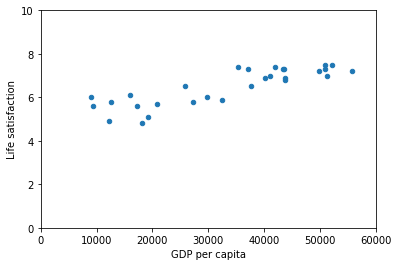

In [10]:
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.show()

# Select a linear model

In [13]:
model = sklearn.linear_model.LinearRegression()

# Train the model

In [14]:
model.fit(X, y)

ValueError: Expected 2D array, got 1D array instead:
array=[    0.            60.06006006   120.12012012   180.18018018
   240.24024024   300.3003003    360.36036036   420.42042042
   480.48048048   540.54054054   600.6006006    660.66066066
   720.72072072   780.78078078   840.84084084   900.9009009
   960.96096096  1021.02102102  1081.08108108  1141.14114114
  1201.2012012   1261.26126126  1321.32132132  1381.38138138
  1441.44144144  1501.5015015   1561.56156156  1621.62162162
  1681.68168168  1741.74174174  1801.8018018   1861.86186186
  1921.92192192  1981.98198198  2042.04204204  2102.1021021
  2162.16216216  2222.22222222  2282.28228228  2342.34234234
  2402.4024024   2462.46246246  2522.52252252  2582.58258258
  2642.64264264  2702.7027027   2762.76276276  2822.82282282
  2882.88288288  2942.94294294  3003.003003    3063.06306306
  3123.12312312  3183.18318318  3243.24324324  3303.3033033
  3363.36336336  3423.42342342  3483.48348348  3543.54354354
  3603.6036036   3663.66366366  3723.72372372  3783.78378378
  3843.84384384  3903.9039039   3963.96396396  4024.02402402
  4084.08408408  4144.14414414  4204.2042042   4264.26426426
  4324.32432432  4384.38438438  4444.44444444  4504.5045045
  4564.56456456  4624.62462462  4684.68468468  4744.74474474
  4804.8048048   4864.86486486  4924.92492492  4984.98498498
  5045.04504505  5105.10510511  5165.16516517  5225.22522523
  5285.28528529  5345.34534535  5405.40540541  5465.46546547
  5525.52552553  5585.58558559  5645.64564565  5705.70570571
  5765.76576577  5825.82582583  5885.88588589  5945.94594595
  6006.00600601  6066.06606607  6126.12612613  6186.18618619
  6246.24624625  6306.30630631  6366.36636637  6426.42642643
  6486.48648649  6546.54654655  6606.60660661  6666.66666667
  6726.72672673  6786.78678679  6846.84684685  6906.90690691
  6966.96696697  7027.02702703  7087.08708709  7147.14714715
  7207.20720721  7267.26726727  7327.32732733  7387.38738739
  7447.44744745  7507.50750751  7567.56756757  7627.62762763
  7687.68768769  7747.74774775  7807.80780781  7867.86786787
  7927.92792793  7987.98798799  8048.04804805  8108.10810811
  8168.16816817  8228.22822823  8288.28828829  8348.34834835
  8408.40840841  8468.46846847  8528.52852853  8588.58858859
  8648.64864865  8708.70870871  8768.76876877  8828.82882883
  8888.88888889  8948.94894895  9009.00900901  9069.06906907
  9129.12912913  9189.18918919  9249.24924925  9309.30930931
  9369.36936937  9429.42942943  9489.48948949  9549.54954955
  9609.60960961  9669.66966967  9729.72972973  9789.78978979
  9849.84984985  9909.90990991  9969.96996997 10030.03003003
 10090.09009009 10150.15015015 10210.21021021 10270.27027027
 10330.33033033 10390.39039039 10450.45045045 10510.51051051
 10570.57057057 10630.63063063 10690.69069069 10750.75075075
 10810.81081081 10870.87087087 10930.93093093 10990.99099099
 11051.05105105 11111.11111111 11171.17117117 11231.23123123
 11291.29129129 11351.35135135 11411.41141141 11471.47147147
 11531.53153153 11591.59159159 11651.65165165 11711.71171171
 11771.77177177 11831.83183183 11891.89189189 11951.95195195
 12012.01201201 12072.07207207 12132.13213213 12192.19219219
 12252.25225225 12312.31231231 12372.37237237 12432.43243243
 12492.49249249 12552.55255255 12612.61261261 12672.67267267
 12732.73273273 12792.79279279 12852.85285285 12912.91291291
 12972.97297297 13033.03303303 13093.09309309 13153.15315315
 13213.21321321 13273.27327327 13333.33333333 13393.39339339
 13453.45345345 13513.51351351 13573.57357357 13633.63363363
 13693.69369369 13753.75375375 13813.81381381 13873.87387387
 13933.93393393 13993.99399399 14054.05405405 14114.11411411
 14174.17417417 14234.23423423 14294.29429429 14354.35435435
 14414.41441441 14474.47447447 14534.53453453 14594.59459459
 14654.65465465 14714.71471471 14774.77477477 14834.83483483
 14894.89489489 14954.95495495 15015.01501502 15075.07507508
 15135.13513514 15195.1951952  15255.25525526 15315.31531532
 15375.37537538 15435.43543544 15495.4954955  15555.55555556
 15615.61561562 15675.67567568 15735.73573574 15795.7957958
 15855.85585586 15915.91591592 15975.97597598 16036.03603604
 16096.0960961  16156.15615616 16216.21621622 16276.27627628
 16336.33633634 16396.3963964  16456.45645646 16516.51651652
 16576.57657658 16636.63663664 16696.6966967  16756.75675676
 16816.81681682 16876.87687688 16936.93693694 16996.996997
 17057.05705706 17117.11711712 17177.17717718 17237.23723724
 17297.2972973  17357.35735736 17417.41741742 17477.47747748
 17537.53753754 17597.5975976  17657.65765766 17717.71771772
 17777.77777778 17837.83783784 17897.8978979  17957.95795796
 18018.01801802 18078.07807808 18138.13813814 18198.1981982
 18258.25825826 18318.31831832 18378.37837838 18438.43843844
 18498.4984985  18558.55855856 18618.61861862 18678.67867868
 18738.73873874 18798.7987988  18858.85885886 18918.91891892
 18978.97897898 19039.03903904 19099.0990991  19159.15915916
 19219.21921922 19279.27927928 19339.33933934 19399.3993994
 19459.45945946 19519.51951952 19579.57957958 19639.63963964
 19699.6996997  19759.75975976 19819.81981982 19879.87987988
 19939.93993994 20000.         20060.06006006 20120.12012012
 20180.18018018 20240.24024024 20300.3003003  20360.36036036
 20420.42042042 20480.48048048 20540.54054054 20600.6006006
 20660.66066066 20720.72072072 20780.78078078 20840.84084084
 20900.9009009  20960.96096096 21021.02102102 21081.08108108
 21141.14114114 21201.2012012  21261.26126126 21321.32132132
 21381.38138138 21441.44144144 21501.5015015  21561.56156156
 21621.62162162 21681.68168168 21741.74174174 21801.8018018
 21861.86186186 21921.92192192 21981.98198198 22042.04204204
 22102.1021021  22162.16216216 22222.22222222 22282.28228228
 22342.34234234 22402.4024024  22462.46246246 22522.52252252
 22582.58258258 22642.64264264 22702.7027027  22762.76276276
 22822.82282282 22882.88288288 22942.94294294 23003.003003
 23063.06306306 23123.12312312 23183.18318318 23243.24324324
 23303.3033033  23363.36336336 23423.42342342 23483.48348348
 23543.54354354 23603.6036036  23663.66366366 23723.72372372
 23783.78378378 23843.84384384 23903.9039039  23963.96396396
 24024.02402402 24084.08408408 24144.14414414 24204.2042042
 24264.26426426 24324.32432432 24384.38438438 24444.44444444
 24504.5045045  24564.56456456 24624.62462462 24684.68468468
 24744.74474474 24804.8048048  24864.86486486 24924.92492492
 24984.98498498 25045.04504505 25105.10510511 25165.16516517
 25225.22522523 25285.28528529 25345.34534535 25405.40540541
 25465.46546547 25525.52552553 25585.58558559 25645.64564565
 25705.70570571 25765.76576577 25825.82582583 25885.88588589
 25945.94594595 26006.00600601 26066.06606607 26126.12612613
 26186.18618619 26246.24624625 26306.30630631 26366.36636637
 26426.42642643 26486.48648649 26546.54654655 26606.60660661
 26666.66666667 26726.72672673 26786.78678679 26846.84684685
 26906.90690691 26966.96696697 27027.02702703 27087.08708709
 27147.14714715 27207.20720721 27267.26726727 27327.32732733
 27387.38738739 27447.44744745 27507.50750751 27567.56756757
 27627.62762763 27687.68768769 27747.74774775 27807.80780781
 27867.86786787 27927.92792793 27987.98798799 28048.04804805
 28108.10810811 28168.16816817 28228.22822823 28288.28828829
 28348.34834835 28408.40840841 28468.46846847 28528.52852853
 28588.58858859 28648.64864865 28708.70870871 28768.76876877
 28828.82882883 28888.88888889 28948.94894895 29009.00900901
 29069.06906907 29129.12912913 29189.18918919 29249.24924925
 29309.30930931 29369.36936937 29429.42942943 29489.48948949
 29549.54954955 29609.60960961 29669.66966967 29729.72972973
 29789.78978979 29849.84984985 29909.90990991 29969.96996997
 30030.03003003 30090.09009009 30150.15015015 30210.21021021
 30270.27027027 30330.33033033 30390.39039039 30450.45045045
 30510.51051051 30570.57057057 30630.63063063 30690.69069069
 30750.75075075 30810.81081081 30870.87087087 30930.93093093
 30990.99099099 31051.05105105 31111.11111111 31171.17117117
 31231.23123123 31291.29129129 31351.35135135 31411.41141141
 31471.47147147 31531.53153153 31591.59159159 31651.65165165
 31711.71171171 31771.77177177 31831.83183183 31891.89189189
 31951.95195195 32012.01201201 32072.07207207 32132.13213213
 32192.19219219 32252.25225225 32312.31231231 32372.37237237
 32432.43243243 32492.49249249 32552.55255255 32612.61261261
 32672.67267267 32732.73273273 32792.79279279 32852.85285285
 32912.91291291 32972.97297297 33033.03303303 33093.09309309
 33153.15315315 33213.21321321 33273.27327327 33333.33333333
 33393.39339339 33453.45345345 33513.51351351 33573.57357357
 33633.63363363 33693.69369369 33753.75375375 33813.81381381
 33873.87387387 33933.93393393 33993.99399399 34054.05405405
 34114.11411411 34174.17417417 34234.23423423 34294.29429429
 34354.35435435 34414.41441441 34474.47447447 34534.53453453
 34594.59459459 34654.65465465 34714.71471471 34774.77477477
 34834.83483483 34894.89489489 34954.95495495 35015.01501502
 35075.07507508 35135.13513514 35195.1951952  35255.25525526
 35315.31531532 35375.37537538 35435.43543544 35495.4954955
 35555.55555556 35615.61561562 35675.67567568 35735.73573574
 35795.7957958  35855.85585586 35915.91591592 35975.97597598
 36036.03603604 36096.0960961  36156.15615616 36216.21621622
 36276.27627628 36336.33633634 36396.3963964  36456.45645646
 36516.51651652 36576.57657658 36636.63663664 36696.6966967
 36756.75675676 36816.81681682 36876.87687688 36936.93693694
 36996.996997   37057.05705706 37117.11711712 37177.17717718
 37237.23723724 37297.2972973  37357.35735736 37417.41741742
 37477.47747748 37537.53753754 37597.5975976  37657.65765766
 37717.71771772 37777.77777778 37837.83783784 37897.8978979
 37957.95795796 38018.01801802 38078.07807808 38138.13813814
 38198.1981982  38258.25825826 38318.31831832 38378.37837838
 38438.43843844 38498.4984985  38558.55855856 38618.61861862
 38678.67867868 38738.73873874 38798.7987988  38858.85885886
 38918.91891892 38978.97897898 39039.03903904 39099.0990991
 39159.15915916 39219.21921922 39279.27927928 39339.33933934
 39399.3993994  39459.45945946 39519.51951952 39579.57957958
 39639.63963964 39699.6996997  39759.75975976 39819.81981982
 39879.87987988 39939.93993994 40000.         40060.06006006
 40120.12012012 40180.18018018 40240.24024024 40300.3003003
 40360.36036036 40420.42042042 40480.48048048 40540.54054054
 40600.6006006  40660.66066066 40720.72072072 40780.78078078
 40840.84084084 40900.9009009  40960.96096096 41021.02102102
 41081.08108108 41141.14114114 41201.2012012  41261.26126126
 41321.32132132 41381.38138138 41441.44144144 41501.5015015
 41561.56156156 41621.62162162 41681.68168168 41741.74174174
 41801.8018018  41861.86186186 41921.92192192 41981.98198198
 42042.04204204 42102.1021021  42162.16216216 42222.22222222
 42282.28228228 42342.34234234 42402.4024024  42462.46246246
 42522.52252252 42582.58258258 42642.64264264 42702.7027027
 42762.76276276 42822.82282282 42882.88288288 42942.94294294
 43003.003003   43063.06306306 43123.12312312 43183.18318318
 43243.24324324 43303.3033033  43363.36336336 43423.42342342
 43483.48348348 43543.54354354 43603.6036036  43663.66366366
 43723.72372372 43783.78378378 43843.84384384 43903.9039039
 43963.96396396 44024.02402402 44084.08408408 44144.14414414
 44204.2042042  44264.26426426 44324.32432432 44384.38438438
 44444.44444444 44504.5045045  44564.56456456 44624.62462462
 44684.68468468 44744.74474474 44804.8048048  44864.86486486
 44924.92492492 44984.98498498 45045.04504505 45105.10510511
 45165.16516517 45225.22522523 45285.28528529 45345.34534535
 45405.40540541 45465.46546547 45525.52552553 45585.58558559
 45645.64564565 45705.70570571 45765.76576577 45825.82582583
 45885.88588589 45945.94594595 46006.00600601 46066.06606607
 46126.12612613 46186.18618619 46246.24624625 46306.30630631
 46366.36636637 46426.42642643 46486.48648649 46546.54654655
 46606.60660661 46666.66666667 46726.72672673 46786.78678679
 46846.84684685 46906.90690691 46966.96696697 47027.02702703
 47087.08708709 47147.14714715 47207.20720721 47267.26726727
 47327.32732733 47387.38738739 47447.44744745 47507.50750751
 47567.56756757 47627.62762763 47687.68768769 47747.74774775
 47807.80780781 47867.86786787 47927.92792793 47987.98798799
 48048.04804805 48108.10810811 48168.16816817 48228.22822823
 48288.28828829 48348.34834835 48408.40840841 48468.46846847
 48528.52852853 48588.58858859 48648.64864865 48708.70870871
 48768.76876877 48828.82882883 48888.88888889 48948.94894895
 49009.00900901 49069.06906907 49129.12912913 49189.18918919
 49249.24924925 49309.30930931 49369.36936937 49429.42942943
 49489.48948949 49549.54954955 49609.60960961 49669.66966967
 49729.72972973 49789.78978979 49849.84984985 49909.90990991
 49969.96996997 50030.03003003 50090.09009009 50150.15015015
 50210.21021021 50270.27027027 50330.33033033 50390.39039039
 50450.45045045 50510.51051051 50570.57057057 50630.63063063
 50690.69069069 50750.75075075 50810.81081081 50870.87087087
 50930.93093093 50990.99099099 51051.05105105 51111.11111111
 51171.17117117 51231.23123123 51291.29129129 51351.35135135
 51411.41141141 51471.47147147 51531.53153153 51591.59159159
 51651.65165165 51711.71171171 51771.77177177 51831.83183183
 51891.89189189 51951.95195195 52012.01201201 52072.07207207
 52132.13213213 52192.19219219 52252.25225225 52312.31231231
 52372.37237237 52432.43243243 52492.49249249 52552.55255255
 52612.61261261 52672.67267267 52732.73273273 52792.79279279
 52852.85285285 52912.91291291 52972.97297297 53033.03303303
 53093.09309309 53153.15315315 53213.21321321 53273.27327327
 53333.33333333 53393.39339339 53453.45345345 53513.51351351
 53573.57357357 53633.63363363 53693.69369369 53753.75375375
 53813.81381381 53873.87387387 53933.93393393 53993.99399399
 54054.05405405 54114.11411411 54174.17417417 54234.23423423
 54294.29429429 54354.35435435 54414.41441441 54474.47447447
 54534.53453453 54594.59459459 54654.65465465 54714.71471471
 54774.77477477 54834.83483483 54894.89489489 54954.95495495
 55015.01501502 55075.07507508 55135.13513514 55195.1951952
 55255.25525526 55315.31531532 55375.37537538 55435.43543544
 55495.4954955  55555.55555556 55615.61561562 55675.67567568
 55735.73573574 55795.7957958  55855.85585586 55915.91591592
 55975.97597598 56036.03603604 56096.0960961  56156.15615616
 56216.21621622 56276.27627628 56336.33633634 56396.3963964
 56456.45645646 56516.51651652 56576.57657658 56636.63663664
 56696.6966967  56756.75675676 56816.81681682 56876.87687688
 56936.93693694 56996.996997   57057.05705706 57117.11711712
 57177.17717718 57237.23723724 57297.2972973  57357.35735736
 57417.41741742 57477.47747748 57537.53753754 57597.5975976
 57657.65765766 57717.71771772 57777.77777778 57837.83783784
 57897.8978979  57957.95795796 58018.01801802 58078.07807808
 58138.13813814 58198.1981982  58258.25825826 58318.31831832
 58378.37837838 58438.43843844 58498.4984985  58558.55855856
 58618.61861862 58678.67867868 58738.73873874 58798.7987988
 58858.85885886 58918.91891892 58978.97897898 59039.03903904
 59099.0990991  59159.15915916 59219.21921922 59279.27927928
 59339.33933934 59399.3993994  59459.45945946 59519.51951952
 59579.57957958 59639.63963964 59699.6996997  59759.75975976
 59819.81981982 59879.87987988 59939.93993994 60000.        ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# Make a prediction for Cyprus

In [14]:
X_new = [[22587]] # Cyprus' GDP per capita
print(model.predict(X_new))

[[5.96242338]]


# Try instance-based model and predict

In [15]:
instance_based_model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
instance_based_model.fit(X, y)
print(instance_based_model.predict(X_new))

[[5.76666667]]


# Plot the models

## Plotting the model-based model (linear regression)

In [16]:
t0, t1 = model.intercept_[0], model.coef_[0][0]
t0, t1

(4.853052800266436, 4.911544589158484e-05)

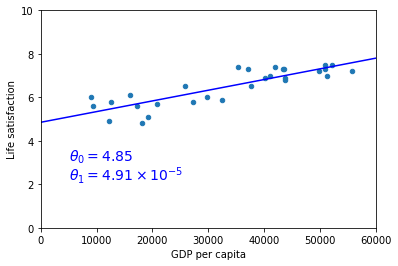

In [17]:
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
plt.show()

## Plotting the instance-based model

In [ ]:
# How do we do this?

# Evaluate the models

In [25]:
instance_based_model.score(X, y)

0.8525732853499179

In [26]:
model.score(X, y)

0.734441435543703